In [38]:
import pandas as pd
data=pd.read_csv(r"H:\TOPMENTOR\2024\May-month\Projects\Files\KNN Assignment\bangalore house price prediction OHE-data.csv")

In [39]:
data.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X = data.loc[:, data.columns != 'price_per_sqft']
y =data['price_per_sqft']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
print(X_test.shape)
print(y_test.shape)

(1424, 107)
(1424,)


In [46]:
### Model building
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)  ## k=3 chosen based on error method
model_train=model.fit(X_train,y_train)
print("Model training completed")

Model training completed


In [53]:
from sklearn.metrics import r2_score,mean_squared_error
pred=model_train.predict(X_test)
round(r2_score(y_test,pred),3)

0.911

In [48]:
## How to choose value of k ; it will be based on error 
error = []
k= []
for i in range(1,10):
    print("when k =", i)
    model=KNeighborsRegressor(n_neighbors=i)
    model_train=model.fit(X_train,y_train)
    print("Model training completed")
    err=(1-(model_train.score(X_train,y_train)))
    error.append(err)
    k.append(i)

when k = 1
Model training completed
when k = 2
Model training completed
when k = 3
Model training completed
when k = 4
Model training completed
when k = 5
Model training completed
when k = 6
Model training completed
when k = 7
Model training completed
when k = 8
Model training completed
when k = 9
Model training completed


In [49]:
error

[0.0,
 0.011483229041051257,
 0.02105860818826155,
 0.028310620946239262,
 0.03731125298175919,
 0.04598968096576461,
 0.05286013038598092,
 0.057716128554877955,
 0.06712551384497445]

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

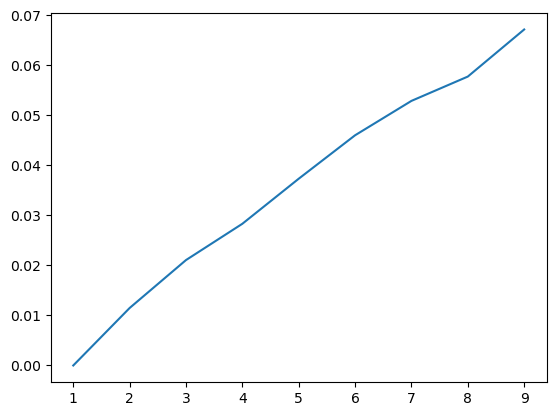

In [51]:
plt.plot(k,error)